In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
data_d = np.loadtxt("../lin_dipole/data/Fld/rmhdfs_r0.1.slab_linear.run07D4_j-phi.g0000.idn.001")
data_c = np.loadtxt("../lin_dipole/data/Fld/rmhdfs_r0.1.slab_linear.run07D4_j-phi.g0000.icr.001")
data_v = np.loadtxt("../lin_dipole/data/Fld/rmhdfs_r0.1.slab_linear.run07D4_j-phi.g0000.iog.001")

In [2]:
fig_set = {
    "axes.linewidth": .5,
    "axes.labelsize": 10,
    "axes.labelpad": 4.0,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "ytick.right" : True,
    "xtick.minor.visible" : False,
    "ytick.minor.visible" : True,
    "font.size": 10,
    "font.family": 'sans-serif',
    "legend.framealpha": .5,
    "legend.frameon" : False,
    "xtick.direction": 'in',  
    "ytick.direction": 'in' 
}
plt.rcParams.update(fig_set)

In [3]:
dt = 1.0
nx = 1280*2+1
nt = int(data_d.shape[0]/nx)
x  = data_d[0:nx,0]
xx = 90-np.arcsin(np.sqrt(x))*180/np.pi
xc = np.arcsin(np.sqrt(x))*180/np.pi
t  = dt * np.arange(nt)

dns = ( data_d[:,1]+1j*data_d[:,2] ).reshape(nt,nx)
dns = dns / ( np.abs( dns[0,:].real ) ).max()
omg = ( data_v[:,1]+1j*data_v[:,2] ).reshape(nt,nx)
omg = omg / ( np.abs( omg[0,:].real ) ).max()
cpr = ( data_c[:,1]+1j*data_c[:,2] ).reshape(nt,nx)
cpr = cpr / ( np.abs( cpr[0,:].real ) ).max()

In [4]:
a = np.zeros((len(dns.real[:,0]), len(dns.real[0,:])))
print(a.shape)

for i in range(nt):
    a[i,:] = np.abs(signal.hilbert(dns.real[i,:]))

am = np.zeros((len(dns.real[:,0])))
xm=  np.zeros((len(dns.real[:,0])))
print(am.shape)
for m in range(nt):
    for n in range(nx):
        if a[m,n] > a[m,:].max() * 0.99999999999999:
            am[m] = a[m,n]
            xm[m] = xc[n]

(1801, 2561)
(1801,)


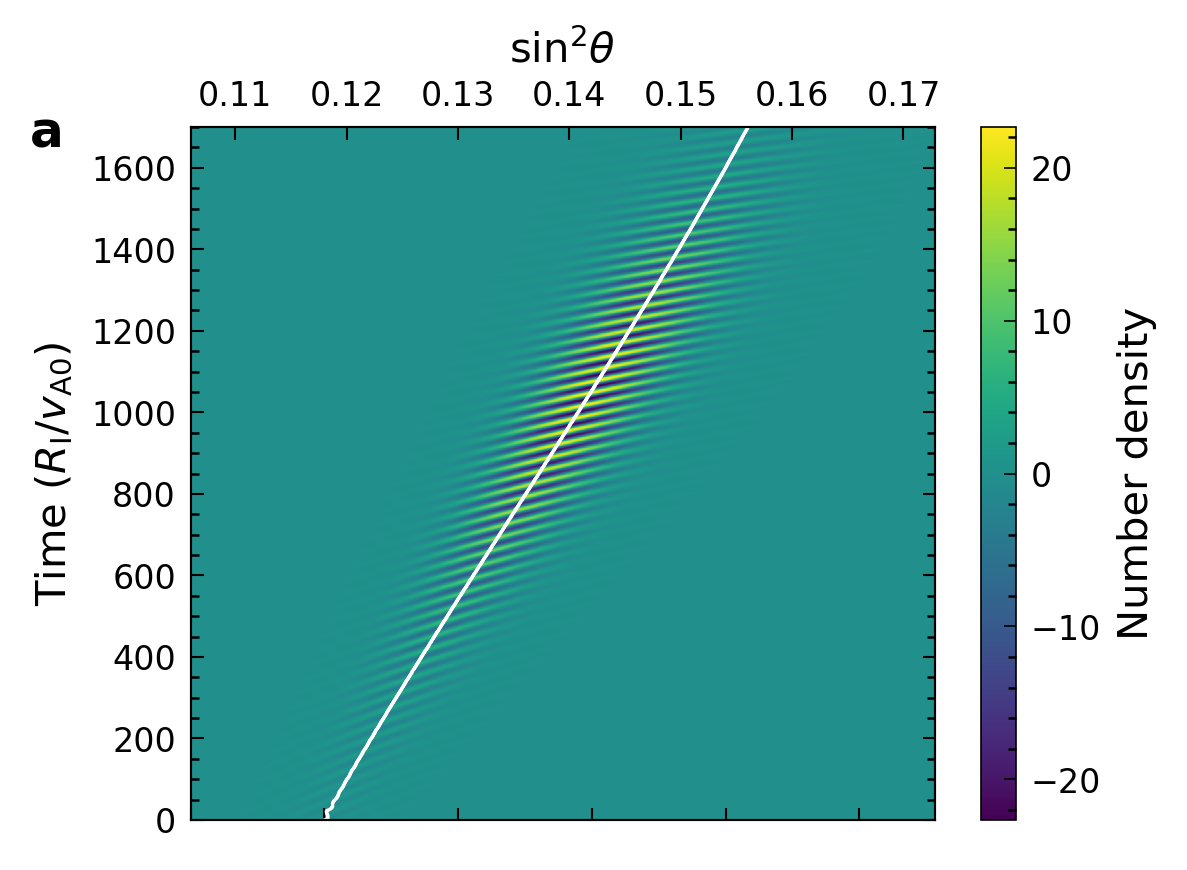

In [5]:
### 2D color plot n(t,x) ###
dpi = 300
fig, ax= plt.subplots(figsize=(4,3), dpi=dpi)
ax.plot(xm,t,linewidth=.8, color="white", linestyle="solid" , alpha=1.0 ,rasterized=True)   ######. 群速度
# COLATITULE
quad = ax.pcolormesh(xc,t,dns.real,rasterized=True,cmap="viridis", shading="auto")
cbar = fig.colorbar(quad)
cbar.ax.tick_params(labelsize=8,width =0.4)
cbar.outline.set_linewidth(0.4)
cbar.set_label("Number density")
ax.tick_params( labelsize= 8, width=0.5)
ax.axes.xaxis.set_ticklabels([])
ax2 = ax.twiny()
ax2.tick_params( labelsize= 8, width=0.5)
ax2.set_xlabel("$\sin^2\\theta$" )
ax2.set_xlim(np.sin(19/180*np.pi)**2, np.sin(xc.max()/180*np.pi)**2 )
# COLATITUDE
ax.set_xlim(19, xc.max())
ax.set_ylim(0, 1700)
# COLATITUDE
ax.set_ylabel("Time ($R_\mathrm{I}/v_{\mathrm{A}0}$)")
ax.text(17.8, 1650, "a", fontfamily="sans-serif", fontweight="bold", fontsize=12)
plt.savefig("../fig3-6/fig_sub/fig_ion_dns.png", bbox_inches='tight', pad_inches=0.02)
plt.show()

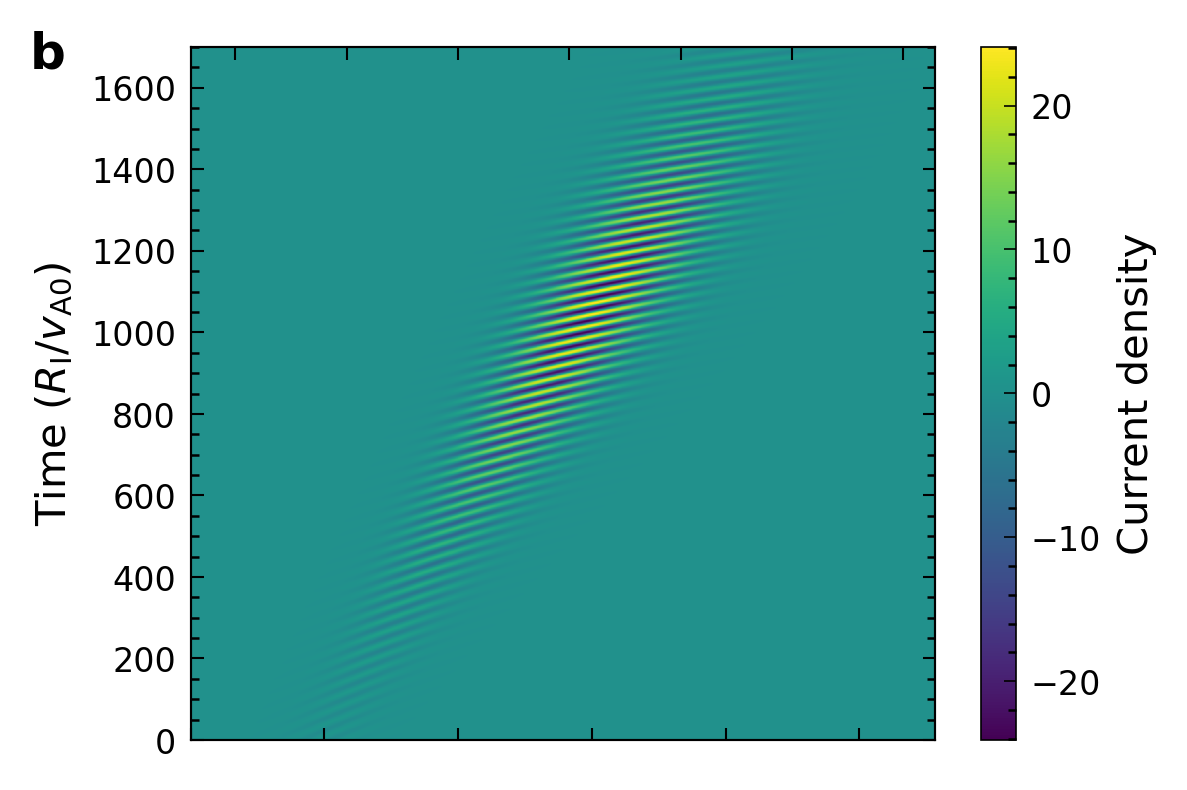

In [7]:
### 2D color plot j(t,x) ###
fig, ax= plt.subplots(figsize=(4,3), dpi=dpi)
quad = ax.pcolormesh(xc,t,cpr.real,rasterized=True,cmap="viridis", shading="auto")
cbar = fig.colorbar(quad)
cbar.ax.tick_params(labelsize=8,width =0.4)
cbar.outline.set_linewidth(0.4)
cbar.set_label("Current density")
ax.tick_params( labelsize= 8, width=0.5)
ax2 = ax.twiny()
ax2.tick_params( labelsize= 8, width=0.5)
ax2.set_xlim(np.sin(19/180*np.pi)**2, np.sin(xc.max()/180*np.pi)**2 )
ax.set_xlim(19, xc.max())
ax.set_ylim(0, 1700)
ax.axes.xaxis.set_ticklabels([])
ax2.axes.xaxis.set_ticklabels([])
ax.set_ylabel("Time ($R_\mathrm{I}/v_{\mathrm{A}0}$)")
ax.text(17.8, 1650, "b", fontfamily="sans-serif", fontweight="bold", fontsize=12)
plt.savefig("../fig3-6/fig_sub/fig_ion_cpr.png", bbox_inches='tight', pad_inches=0.02)
plt.show()

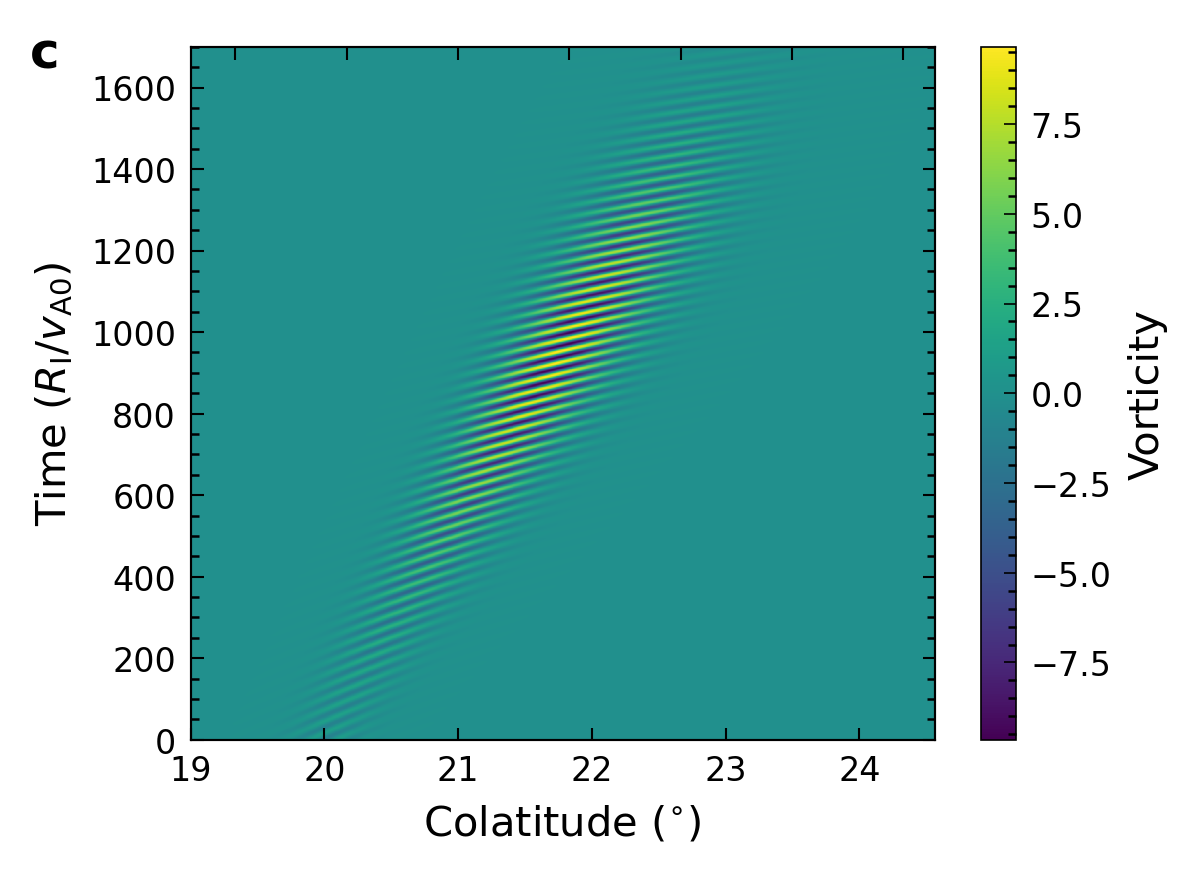

In [8]:
### 2D color plot omg(t,x) ###
fig, ax= plt.subplots(figsize=(4,3), dpi=dpi)
quad = ax.pcolormesh(xc,t,omg.real,rasterized=True,cmap="viridis", shading="auto")
cbar = fig.colorbar(quad)#, shrink=1.0, aspect=10.0)
cbar.ax.tick_params(labelsize=8,width =0.4)
cbar.outline.set_linewidth(0.4)
cbar.set_label("Vorticity")
ax.tick_params( labelsize= 8, width=0.5)
ax2 = ax.twiny()
ax2.tick_params( labelsize= 8, width=0.5)
ax2.set_xlim(np.sin(19/180*np.pi)**2, np.sin(xc.max()/180*np.pi)**2 )
ax.set_xlim(19, xc.max())
ax.set_ylim(0, 1700)
ax.set_xlabel( "Colatitude $(^\mathrm{\circ})$") 
ax2.axes.xaxis.set_ticklabels([])
ax.set_ylabel("Time ($R_\mathrm{I}/v_{\mathrm{A}0}$)")
ax.text(17.8, 1650, "c", fontfamily="sans-serif", fontweight="bold", fontsize=12)
plt.savefig("../fig3-6/fig_sub/fig_ion_omg.png", bbox_inches='tight', pad_inches=0.02)
plt.show()

In [9]:
import cv2

im1 = cv2.imread('../fig3-6/fig_sub/fig_ion_dns.png')
im2 = cv2.imread('../fig3-6/fig_sub/fig_ion_cpr.png')
im3 = cv2.imread('../fig3-6/fig_sub/fig_ion_omg.png')

im_v = cv2.vconcat([im1, im2])
cv2.imwrite('../fig3-6/fig_sub/fig_ion_tmp.png', cv2.vconcat([im1, im2]) )

im_tmp = cv2.imread('../fig3-6/fig_sub/fig_ion_tmp.png')

width = im_tmp.shape[1] 
im3_resize = cv2.resize(im3, (width, int(im3.shape[0] * width / im3.shape[1])), interpolation=cv2.INTER_CUBIC)
im_concat = cv2.vconcat([im_tmp, im3_resize])
cv2.imwrite('../fig3-6/fig4.png', im_concat)

True